Import

In [11]:
import pandas as pd

Import Data

In [12]:
INPUT_NAME='train_wikipedia'
#INPUT_NAME='train_civil'
df=pd.read_csv("../data/"+INPUT_NAME+ "_abbreviated_separated.csv")

In [13]:
toxic_words = ['fuck',
 'fucking',
 'shit',
 'stupid',
 'suck',
 'bitch',
 'ass',
 'gay',
 'dick',
 'idiot',
 'asshole',
 'hell',
 'cunt',
 'faggot',
 'hate',
 'penis',
 'sucks',
 'cock',
 'fag',
 'crap',
 'dumb',
 'fat',
 'nigger',
 'bastard',
 'bullshit',
 'damn',
 'moron',
 'fucker',
 'loser',
 'idiots',
 'fuckin',
 'nazi',
 'motherfucker',
 'pussy',
 'jerk',
 'retard']
df_toxic_words = pd.DataFrame(toxic_words, columns=['toxic'])

Select X and Y

In [14]:
df_toxic = df.loc[df.toxic==1]
df_not_toxic = df.loc[df.toxic==0]
X_not_toxic = df_not_toxic['comment_text'] 
X = df_toxic['comment_text'] 
Y = df_toxic['toxic']

Preprocess toxic X and fit words of not-toxic data to vector

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

analyzer = CountVectorizer().build_analyzer()

vect = TfidfVectorizer(min_df=20, 
                        ngram_range=(1,1), stop_words='english', 
                        lowercase=True)
X_vect_toxic = vect.fit_transform(X)
X_vect_not_toxic = vect.transform(X_not_toxic)


From sparse to dense arrays

In [16]:
X_toxic_array = X_vect_toxic.toarray()
df_occurrence_in_toxic = pd.DataFrame(data=X_toxic_array,columns = vect.get_feature_names_out())
df_occurrence_in_toxic['nottoxic'] = 0
df_occurrence_in_toxic

,10,100,11,12,13,14,15,16,17,18,...,youd,youll,young,youre,youtube,youve,yu,zero,zionist,nottoxic
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21379,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21380,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21381,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21382,0.0,0.0,0.0,0.085846,0.0,0.0,0.0,0.178505,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
#df_occurrence_in_toxic.sum().sort_values(ascending=False).to_csv('more_toxic.csv')

In [17]:
X_not_toxic_array = X_vect_not_toxic.toarray()
df_occurrence_in_nottoxic = pd.DataFrame(data=X_not_toxic_array,columns = vect.get_feature_names_out())
df_occurrence_in_nottoxic['nottoxic'] = 1
df_occurrence_in_nottoxic

,10,100,11,12,13,14,15,16,17,18,...,youd,youll,young,youre,youtube,youve,yu,zero,zionist,nottoxic
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.422248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202144,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
202145,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
202146,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
202147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [18]:
df_occurrence = pd.concat([df_occurrence_in_toxic, df_occurrence_in_nottoxic])

In [19]:
df_occurrence

,10,100,11,12,13,14,15,16,17,18,...,youd,youll,young,youre,youtube,youve,yu,zero,zionist,nottoxic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
202145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
202146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
202147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [23]:
n = list(df_toxic_words['toxic'].values)
n

['fuck',
 'fucking',
 'shit',
 'stupid',
 'suck',
 'bitch',
 'ass',
 'gay',
 'dick',
 'idiot',
 'asshole',
 'hell',
 'cunt',
 'faggot',
 'hate',
 'penis',
 'sucks',
 'cock',
 'fag',
 'crap',
 'dumb',
 'fat',
 'nigger',
 'bastard',
 'bullshit',
 'damn',
 'moron',
 'fucker',
 'loser',
 'idiots',
 'fuckin',
 'nazi',
 'motherfucker',
 'pussy',
 'jerk',
 'retard']

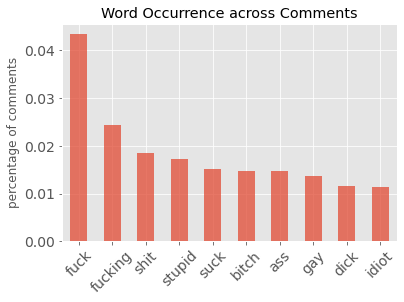

In [27]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

#plt.style.use('seaborn-white')
import matplotlib.pyplot as plt

n = list(df_toxic_words['toxic'].values) #+ ['toxic']
# percentage in toxic comments
ax = df_occurrence.loc[df_occurrence.nottoxic == 0, n].mean().T.sort_values(ascending=False)[:10].plot(kind='bar',alpha=0.75, rot=45)
plt.xlabel("")
plt.ylabel("percentage of comments")
plt.title('Word Occurrence across Comments')
ax.tick_params(labelsize=14)


In [ ]:
#plt.rcParams['axes.prop_cycle']


'#E24A33'
'#348ABD'
'#988ED5'
'#777777'
'#FBC15E'
'#8EBA42'
'#FFB5B8'


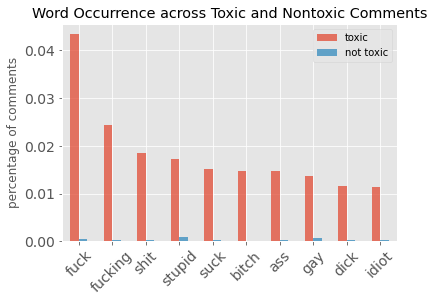

In [38]:
n = list(df_toxic_words['toxic'].values) + ['nottoxic']
ax = df_occurrence.loc[:, n].groupby("nottoxic", as_index=False).mean().rename({0:'toxic', 1:'not toxic'}).T.sort_values(by = 'toxic',ascending=False)[:10].plot(kind='bar',alpha=0.75, rot=45)
plt.ylabel("percentage of comments")
plt.title('Word Occurrence across Toxic and Nontoxic Comments')
ax.tick_params(labelsize=14)


In [ ]:
df_occurrence_in_toxic.loc[:, ['fuck',
 'stupid',
 'idiot',
 'shit',
 'fucking',
 'asshole',
 'ass',
 'bitch',
 'idiots']].mean()

fuck       0.043364
stupid     0.017229
idiot      0.011428
shit       0.018571
fucking    0.024300
asshole    0.010770
ass        0.014861
bitch      0.014864
idiots     0.003991
dtype: float64

In [ ]:
plt.rcParams['axes.prop_cycle'][:2]

'#E24A33'
'#348ABD'


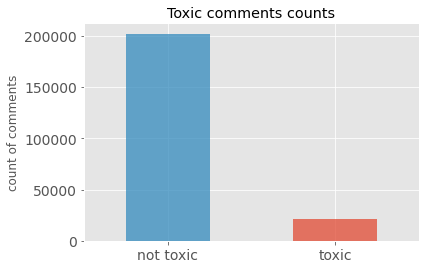

In [40]:
ax = df_occurrence['nottoxic'].value_counts().rename({0:'toxic', 1:'not toxic'}).plot(kind='bar',alpha=0.75, rot=0, color=['#348ABD','#E24A33'])
plt.ylabel("count of comments")
plt.title('Toxic comments counts')
ax.tick_params(labelsize=14)
#set_index(field)

In [ ]:
df_occurrence['toxic'].value_counts()/len(df_occurrence)

1    0.904336
0    0.095664
Name: toxic, dtype: float64